In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align
from MDAnalysis.tests.datafiles import TPR, XTC
from tqdm.auto import tqdm

In [2]:
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step7_300ns_centered.xtc")
protein = u.select_atoms('protein')
print('There are {} residues in the protein'.format(len(protein.residues)))
#protein residues

There are 112 residues in the protein


In [3]:
#Trajectory frames
u_1000 = u.trajectory[::10]
len(u_1000)
time=[]
for ts in tqdm(u_1000):
    time.append(u.trajectory.time)
time=np.array(time)
len(time)

  0%|          | 0/601 [00:00<?, ?it/s]

601

In [4]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

# Load the universe
u = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step7_300ns_centered.xtc")

# Select alpha carbon atoms
ca = u.select_atoms("name CA")

# Initialize mean and sum of squares arrays
means = np.zeros((len(ca), 3))
sumsq = np.zeros_like(means)

# Loop over the trajectory and calculate means and sum of squares
for k, ts in enumerate(u.trajectory):
    sumsq += (k / (k + 1.0)) * (ca.positions - means) ** 2
    means[:] = (k * means + ca.positions) / (k + 1.0)

# Calculate RMSF
rmsf = np.sqrt(sumsq.sum(axis=1) / (k + 1.0))


In [5]:
# Load the universe
u_1 = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Group_1/K26X_step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26X_step7_300ns_centered.xtc")

# Select alpha carbon atoms
ca_1 = u_1.select_atoms("name CA")

# Initialize mean and sum of squares arrays
means_1 = np.zeros((len(ca_1), 3))
sumsq_1 = np.zeros_like(means_1)

# Loop over the trajectory and calculate means and sum of squares
for k, ts in enumerate(u_1.trajectory):
    sumsq_1 += (k / (k + 1.0)) * (ca_1.positions - means_1) ** 2
    means_1[:] = (k * means_1 + ca_1.positions) / (k + 1.0)

# Calculate RMSF
rmsf_1 = np.sqrt(sumsq_1.sum(axis=1) / (k + 1.0))

In [6]:
# Load the universe
u_2 = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Group_1/W34A_step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34A_step7_300ns_centered.xtc")

# Select alpha carbon atoms
ca_2 = u_2.select_atoms("name CA")

# Initialize mean and sum of squares arrays
means_2 = np.zeros((len(ca_2), 3))
sumsq_2 = np.zeros_like(means_2)

# Loop over the trajectory and calculate means and sum of squares
for k, ts in enumerate(u_2.trajectory):
    sumsq_2 += (k / (k + 1.0)) * (ca_2.positions - means_2) ** 2
    means_2[:] = (k * means_2 + ca_2.positions) / (k + 1.0)

# Calculate RMSF
rmsf_2 = np.sqrt(sumsq_2.sum(axis=1) / (k + 1.0))


In [7]:
# Load the universe
u_3 = mda.Universe("/Users/k20098771/Data/2024/CGtoAA/Group_1/W34X_step6_6.tpr", "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34X_step7_300ns_centered.xtc")

# Select alpha carbon atoms
ca_3 = u_3.select_atoms("name CA")

# Initialize mean and sum of squares arrays
means_3 = np.zeros((len(ca_3), 3))
sumsq_3 = np.zeros_like(means_3)

# Loop over the trajectory and calculate means and sum of squares
for k, ts in enumerate(u_3.trajectory):
    sumsq_3 += (k / (k + 1.0)) * (ca_3.positions - means_3) ** 2
    means_3[:] = (k * means_3 + ca_3.positions) / (k + 1.0)

# Calculate RMSF
rmsf_3 = np.sqrt(sumsq_3.sum(axis=1) / (k + 1.0))

In [8]:
# Load the universe
u_4 = mda.Universe("/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_step6_6.tpr", "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_300ns_nojump_center.xtc")

# Select alpha carbon atoms
ca_4 = u_4.select_atoms("name CA")

# Initialize mean and sum of squares arrays
means_4 = np.zeros((len(ca_4), 3))
sumsq_4 = np.zeros_like(means_4)

# Loop over the trajectory and calculate means and sum of squares
for k, ts in enumerate(u_4.trajectory):
    sumsq_4 += (k / (k + 1.0)) * (ca_4.positions - means_4) ** 2
    means_4[:] = (k * means_4 + ca_4.positions) / (k + 1.0)

# Calculate RMSF
rmsf_4 = np.sqrt(sumsq_4.sum(axis=1) / (k + 1.0))

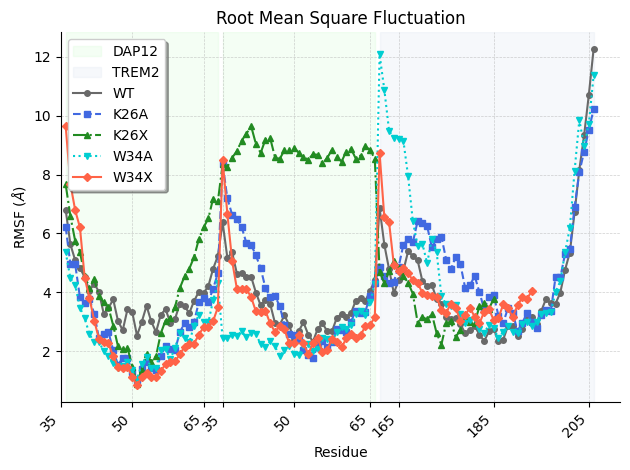

In [9]:
# Background highlighting
plt.axvspan(1, 33, zorder=0, alpha=0.1, color='palegreen', label='DAP12')
plt.axvspan(34, 66, zorder=0, alpha=0.1, color='palegreen')
plt.axvspan(67, 112, zorder=0, alpha=0.1, color='lightsteelblue', label='TREM2')

# Plot lines with different styles and markers
plt.plot(ca_4.residues.resids, rmsf_4, label='WT-230', color='dimgray', linestyle='-', marker='o', markersize=4)
plt.plot(ca.residues.resids, rmsf, label='K26A', color='royalblue', linestyle='--', marker='s', markersize=4)
plt.plot(ca_1.residues.resids, rmsf_1, label='K26X', color='forestgreen', linestyle='-.', marker='^', markersize=4)
plt.plot(ca_2.residues.resids, rmsf_2, label='W34A', color='darkturquoise', linestyle=':', marker='v', markersize=4)
plt.plot(ca_3.residues.resids, rmsf_3, label='W34X', color='tomato', linestyle='-', marker='D', markersize=4)

# Axis labels and title
plt.xlabel('Residue')
plt.ylabel('RMSF ($\AA$)')
plt.title('Root Mean Square Fluctuation')

# Custom ticks
xtick_positions = [0, 15, 30, 34, 49, 65, 71, 91, 111]
xtick_labels = ['35', '50', '65', '35', '50', '65', '165', '185', '205']
plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, ha='right')

# Beautify plot
plt.legend(loc='best', frameon=True, shadow=True)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.xlim(left=0)
plt.tight_layout()

# Style axes
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

plt.show()


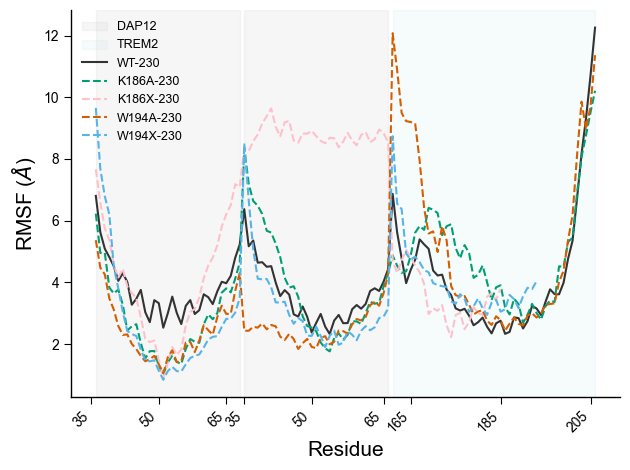

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set Nature-style font and overall design
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "font.size": 10,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "axes.grid": False
})

# Nature Communications–like color palette
colors = {
    'WT': '#333333',      # Dark gray
    'K26A': '#009E73',    # Blue
    'K26X': 'pink'   ,    # Green
    'W34A': '#D55E00',    # Light blue
    'W34X': '#56B4E9',    # Vermilion
}

# Plot background spans
plt.axvspan(1, 33, zorder=0, alpha=0.2, color='lightgrey', label='DAP12')
plt.axvspan(34, 66, zorder=0, alpha=0.2, color='lightgrey')
plt.axvspan(67, 112, zorder=0, alpha=0.1, color='lightblue', label='TREM2')

# Plot data with line only (minimalist style)
plt.plot(ca_4.residues.resids, rmsf_4, label='WT-230', color=colors['WT'], linewidth=1.5)
plt.plot(ca.residues.resids, rmsf, label='K186A-230', color=colors['K26A'], linewidth=1.5,linestyle='--')
plt.plot(ca_1.residues.resids, rmsf_1, label='K186X-230', color=colors['K26X'], linewidth=1.5,linestyle='--')
plt.plot(ca_2.residues.resids, rmsf_2, label='W194A-230', color=colors['W34A'], linewidth=1.5,linestyle='--')
plt.plot(ca_3.residues.resids, rmsf_3, label='W194X-230', color=colors['W34X'], linewidth=1.5,linestyle='--')

# Labels
plt.xlabel('Residue',fontsize=15, fontname='Arial')
plt.ylabel('RMSF ($\AA$)',fontsize=15, fontname='Arial')
# plt.title('Root Mean Square Fluctuation', fontsize=12)

# Custom ticks
xtick_positions = [0, 15, 30, 34, 49, 65, 71, 91, 111]
xtick_labels = ['35', '50', '65', '35', '50', '65', '165', '185', '205']
plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, ha='right')

# Legend
plt.legend(frameon=False, fontsize=9)

# Axis styling
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontname='Arial')
# ax.set_yticklabels(ax.get_yticks(), fontsize=12, fontname='Arial')

plt.tight_layout()

#Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/RMSF_group1.JPEG", dpi=800, format='JPEG',bbox_inches="tight")

plt.show()
